# Bagging and RandomForest



## Preparation

In [0]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [0]:
digits = load_digits()
X, y = digits.data, digits.target

In [0]:
def write_answer(answer, num):
  with open("C2W4_answer{}.txt".format(num), "w") as f:
    f.write(str(answer))

## DecisionTreeClassifier 

In [4]:
dtree_model = DecisionTreeClassifier()
dtree_rate = cross_val_score(dtree_model, X, y, cv=10).mean() 
dtree_rate

0.8286025364545747

In [0]:
write_answer(dtree_rate, 1)

## BaggingClassifier 

In [6]:
bg_model = BaggingClassifier(n_estimators=100)
bg_rate = cross_val_score(bg_model, X, y, cv=10).mean()
bg_rate

0.9221771683367205

In [0]:
write_answer(bg_rate, 2)

## BaggingClassifier with features control

In [8]:
data_features = X.shape[1]
max_features = round(math.sqrt(data_features))
bg2_model = BaggingClassifier(n_estimators=100, max_features=max_features)
bg2_rate = cross_val_score(bg2_model, X, y, cv=10).mean()
bg2_rate

0.9293718507286212

In [0]:
write_answer(bg2_rate, 3)

## BaggingClassifier with randomized  DecisionTree

In [10]:
bg3_model = BaggingClassifier(
    n_estimators=100, 
    base_estimator=DecisionTreeClassifier(max_features=max_features)
)
bg3_rate = cross_val_score(bg3_model, X, y, cv=10).mean()
bg3_rate

0.9532492848189227

In [0]:
write_answer(bg3_rate, 4)

## RandomForestClassifier VS  BaggingClassifier with randomized  DecisionTree

In [0]:
def check_param(params):
  rf_model = RandomForestClassifier(
      **params)
  rf_rate = cross_val_score(bg2_model, X, y, cv=10, n_jobs=4).mean()
  return rf_rate

Text(0, 0.5, 'val_score')

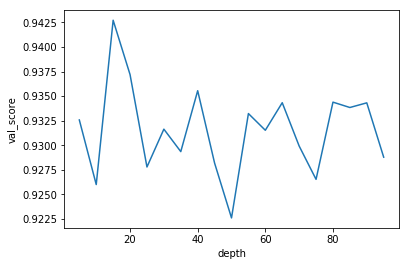

In [13]:
depth_vars = np.arange(0, 100, 5)[1:]
all_params = [({
        'max_depth': var,
        'n_estimators': 100,
        'max_features': max_features
}) for var in depth_vars]
plt.plot(depth_vars, [check_param(params) for params in all_params])

plt.xlabel('depth')
plt.ylabel('val_score')

Text(0, 0.5, 'val_score')

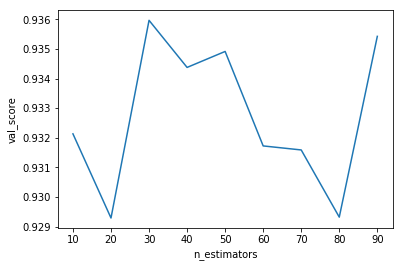

In [14]:
n_estimators_vars = np.arange(10, 100, 10)
all_params = [({
        'max_depth': 5,
        'n_estimators': var,
        'max_features': max_features
}) for var in n_estimators_vars]
plt.plot(n_estimators_vars, [check_param(params) for params in all_params])

plt.xlabel('n_estimators')
plt.ylabel('val_score')

Text(0, 0.5, 'val_score')

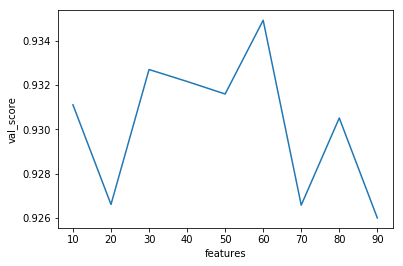

In [15]:
features_vars = np.arange(10, 100, 10)
all_params = [({
        'max_depth': 5,
        'n_estimators': 60,
        'max_features': var
}) for var in features_vars]
plt.plot(features_vars, [check_param(params) for params in all_params])

plt.xlabel('features')
plt.ylabel('val_score')

In [0]:
write_answer('2 3 4 7', 5) # answers to assignment questions